In [0]:
#%cd /usr/local/lib/python3.6/dist-packages
#! pip install git+https://github.com/altair-viz/altair.git
#! pip install vega_datasets
#! pip install altair "vega<2" notebook
#! pip install jupyter pandas vega
#! pip install --upgrade notebook  # need jupyter_client >= 4.2 for sys-prefix below
#! jupyter nbextension install --sys-prefix --py vega
#! pip install --upgrade altair vega

In [0]:
#! pip show vega

In [0]:
# use this other command to list all files under "Location"
# we are checking for the following packages
# altair - enables to build histogram for class representation in examples
# matplotlib - extension of NumPy enables you to embed plots into applications
# pandas - used to clean, transform, manipulate and analize data
# pickle - used to convert a python object into a character stream
# pip - used to manage installation and updates of python packages
# seaborn - based on matplotlib is used to vizualize example lenght by category 
# warnings - used to hide warinings coming from seaborn package
#! ls /usr/local/lib/python3.6/dist-packages

In [0]:
# If you are missign a package use this command to install
# remember to be in your distribution packages folder used by colab 
# before you run the instalation command

#%cd /usr/local/lib/python3.6/dist-packages

# use these commands to install and check installation
# ! pip install nameofpackage
# ! pip show nameofpackage

#! pip install warn
#! pip show warn

In [0]:
#%cd /content/FakeNews/baseline/fnc-1

In [0]:
##! git clone https://github.com/FakeNewsChallenge/fnc-1.git

In [0]:
##import shutil
##shutil.rmtree('/content/PNC1')

In [0]:
#%cd /usr/local/lib/python3.6/dist-packages
#! pip install vega

**Data Set Analysis**

In this step we will check for a balanced data so we can train the machine learning models without oversampling or undersampling classes. If we see some bias towards one class we need to apply techniques to manage this issue with our data set.

First step is to check if we have all Python packages we need be using to visualize the characteristics of the dataset to check for class balance, and install those missing if any. We will need to join files containing labeling of examples to content of articles for our purpose.


We want to check for: 1. Number of examples in each class, 2. Total Percentage of examples in each class, 3. Distribution of the lenght of each example as we will use its word content to train for classification.


In [0]:
# This command will show you the "Location" of your package
# I am using numpy as is the most common package 
#! pip show numpy

Now that we have secured environment requirements for python packages that will be declared in the code, next we will import them into the program

In [76]:
%cd /usr/local/lib/python3.6/dist-packages
import altair as alt
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import seaborn as sns
import warnings

/usr/local/lib/python3.6/dist-packages


We want to check for: 1. Number of examples in each class, 2. Total Percentage of examples in each class, 3. Distribution of the lenght of each example as we will use its word content to train for classification.

Data is already included in /content/FakeNews folder. Data is already separated by example content and labeled files, and also in train, test and demo files to keep process clean.


In [77]:
%cd /content/Fakenews

/content/Fakenews


In [78]:
! ls

train_bodies.csv  train_stances.random.csv


In [0]:
import pandas as pd
train_df=[]
trainbodies_df = []
trainstances_df = []
testbodies_df = []
teststances_df = []
comptestbodies_df = []
comptestbodies_df = []
df_path = "/content/Fakenews/"
df_file_train_bodies = "train_bodies.csv"
df_file_train_stances = "train_stances.random.csv"
trainbodies_df = pd.read_csv( df_path + df_file_train_bodies,
                             keep_default_na=False, na_values=[""])
trainstances_df = pd.read_csv(df_path + df_file_train_stances,
                             keep_default_na=False, na_values=[""])

In [80]:
print("Total stances: " + str(len(trainbodies_df)))
print("Total bodies: " + str(len(trainstances_df)))

Total stances: 1683
Total bodies: 49972


In [81]:
trainbodies_df.columns


Index(['Body ID', 'articleBody'], dtype='object')

In [82]:
trainbodies_df.sort_values(by='Body ID')
trainbodies_df.head()

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...


In [83]:
trainstances_df.columns

Index(['Headline', 'Body ID', 'Stance'], dtype='object')

In [84]:
trainstances_df.sort_values(by='Body ID')
trainstances_df.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,discuss
1,Hundreds of Palestinians flee floods in Gaza a...,158,discuss
2,"Christian Bale passes on role of Steve Jobs, a...",137,disagree
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,disagree
4,Spider burrowed through tourist's stomach and ...,1923,agree


In [85]:
train_df = pd.merge(trainbodies_df,trainstances_df, on="Body ID")
print("Total training examples: " + str(len(train_df)))

Total training examples: 49972


In [86]:
train_df.columns

Index(['Body ID', 'articleBody', 'Headline', 'Stance'], dtype='object')

In [87]:
train_df.head()

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",discuss
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,disagree
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,agree
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,agree


In [88]:
train_df.tail()

,Body ID,articleBody,Headline,Stance
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",disagree
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",unrelated
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",discuss
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,disagree
49971,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,agree


In [94]:
data = trainstances_df['Stance']
data.head()

0     discuss
1     discuss
2    disagree
3    disagree
4       agree
Name: Stance, dtype: object

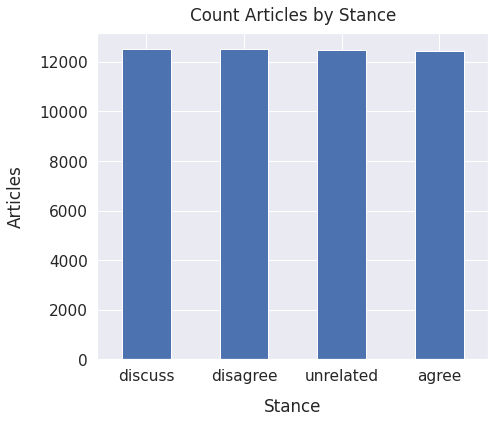

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.4)
data.value_counts().plot(kind='bar', figsize=(7,6), rot=0)
plt.xlabel("Stance", labelpad=14)
plt.ylabel("Articles", labelpad=14)
plt.title("Count Articles by Stance", y=1.02);
fig.show()

In [91]:
trainstances_df['id'] = 1
trainstances_df2 = pd.DataFrame(trainstances_df.groupby('Stance').count()['id']).reset_index()

bars = alt.Chart(trainstances_df2).mark_bar(size=50).encode(
    x=alt.X('Stance'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Stance'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)